In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
plt.rcParams['figure.figsize'] = [15, 7] 
import seaborn as sns

In [5]:
import sklearn, nltk
print('numpy==',np.__version__,sep='')
print('pandas==',pd.__version__,sep='')
print('scikit-learn==',sklearn.__version__,sep='')
print('nltk==',nltk.__version__,sep='')

numpy==1.26.4
pandas==2.2.2
scikit-learn==1.5.2
nltk==3.9.1


In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

# Data Assessment

## Summary

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Column Descriptions

- **v1**: The label (ham or spam)
- **v2**: Raw Text

## Issues with Dataset

1. Dirty Data
   - last 3 columns are useless
  
2. Messy Data
   - v1 should be renamed as target and v2 as text
   - target should be label encoded

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df[df.duplicated()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
102,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
153,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",NaN,NaN,NaN
222,ham,"Sorry, I'll call later",NaN,NaN,NaN
325,ham,No calls..messages..missed calls,NaN,NaN,NaN
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
5535,ham,"I know you are thinkin malaria. But relax, chi...",NaN,NaN,NaN
5539,ham,Just sleeping..and surfing,NaN,NaN,NaN
5553,ham,Hahaha..use your brain dear,NaN,NaN,NaN


# Data Cleaning

In [7]:
import copy
df1 = df.copy(deep=True)

In [8]:
#Removing last 2 columns
df1 = df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [9]:
# Removing suplicated columns
df1 = df1.drop_duplicates()
df1[df1.duplicated()]

,v1,v2


In [10]:
#Renaming columns
df1 = df1.rename(columns={'v1':'target','v2':'text'})

In [11]:
#Label Encoding the target variable
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()
df1['target'] = L.fit_transform(df1['target'])

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# Exploratory Data Analysis

**`Conclusion:`**

- Data is imbalanced having 87% ham SMS.
- Spam has more words and more characters on average.
- There is multicollinearity among chars, words and sentences. So we'll keep only chars as it has highest correlation with target

In [13]:
df1['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

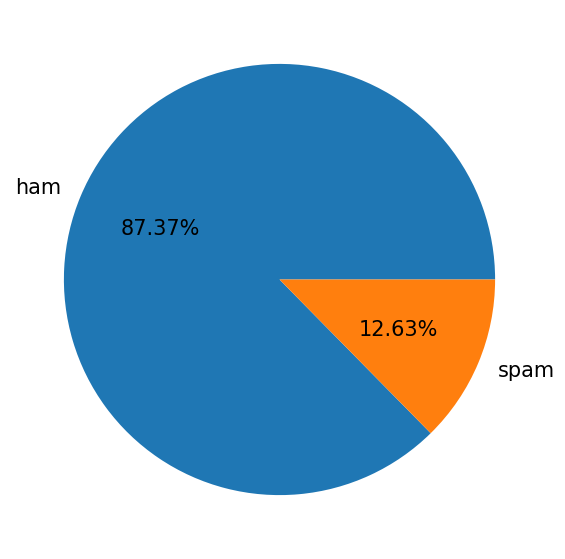

In [14]:
import matplotlib.pyplot as plt
plt.pie(df1['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/imhvs0609/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/imhvs0609/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [16]:
df1['num_characters'] = df1['text'].apply(len)

In [17]:
# num of words
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
# num of sentences
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df1.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


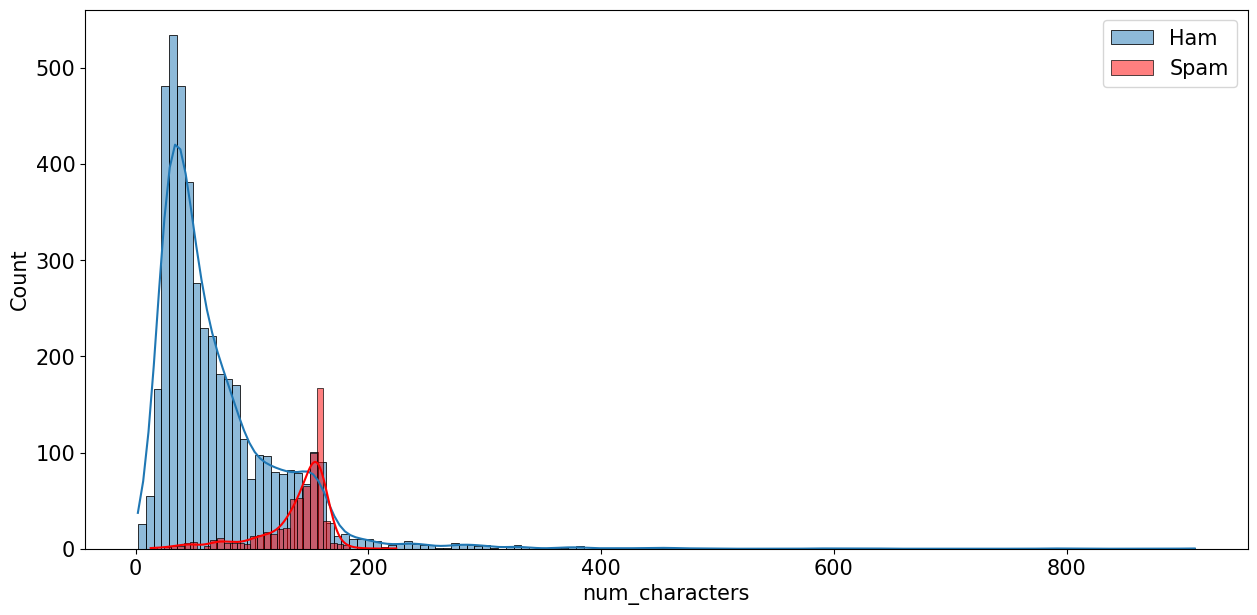

In [20]:
# Ham vs Spam characters
sns.histplot(df1[df1['target'] == 0]['num_characters'],label='Ham',kde=True)
sns.histplot(df1[df1['target'] == 1]['num_characters'],color='red',label='Spam',kde=True)
plt.legend()  # Add legend to the plot
plt.show()

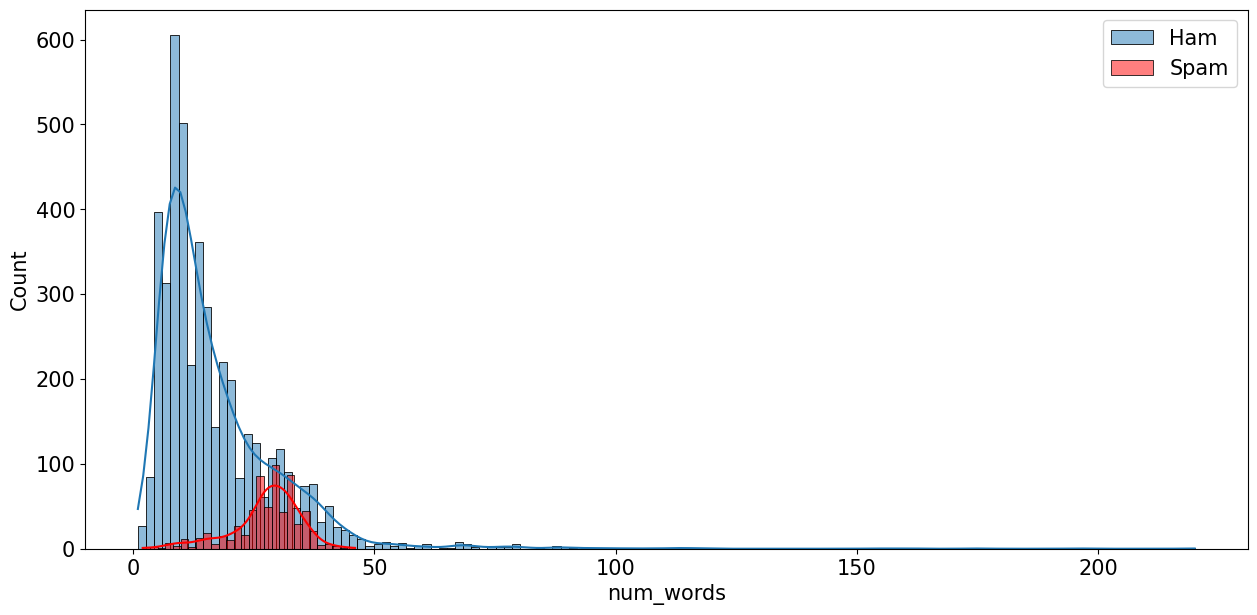

In [21]:
# Ham vs Spam words
sns.histplot(df1[df1['target'] == 0]['num_words'],label='Ham',kde=True)
sns.histplot(df1[df1['target'] == 1]['num_words'],color='red',label='Spam',kde=True)
plt.legend()  # Add legend to the plot
plt.show()

<Axes: >

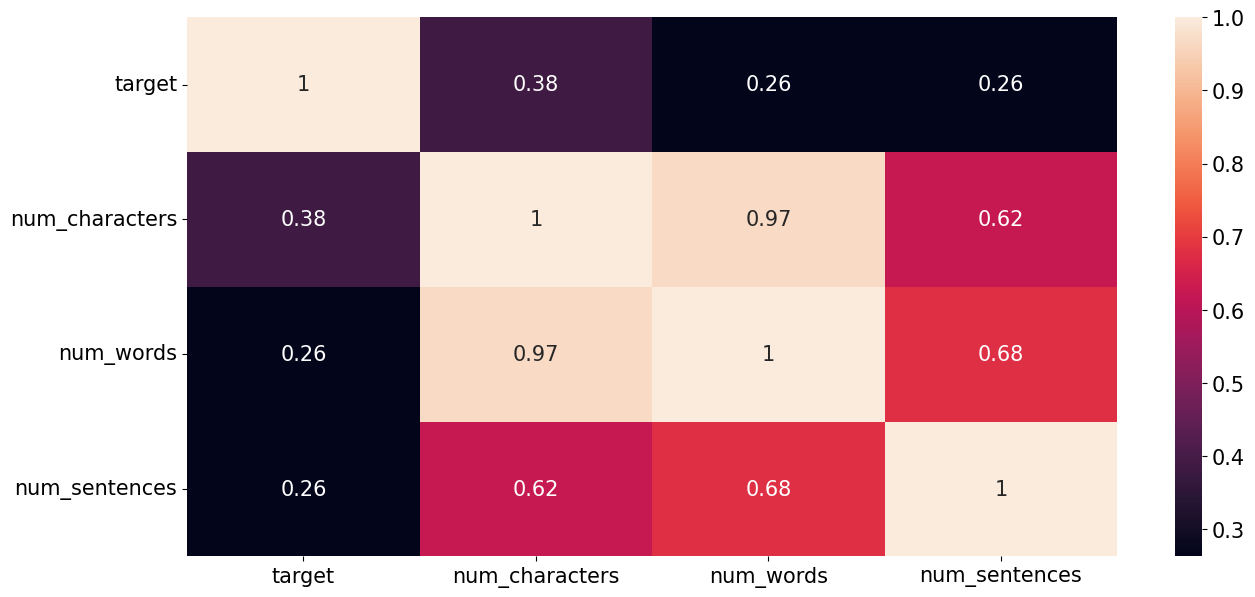

In [22]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

# Text Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [23]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [token for token in text if token.isalnum()]
    text = [token for token in text if token not in list(stopwords.words('english'))]
    text = [token for token in text if token not in string.punctuation]
    ps = PorterStemmer()
    text = [ps.stem(token)for token in text]
    text = ' '.join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imhvs0609/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
transform_text("Hi HOw how how are vansh##$# YOU 20% %&")

'hi vansh 20'

In [25]:
transform_text(df1.loc[0,'text'])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [26]:
df1['transformed_text'] = df1['text'].apply(transform_text)

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.show()

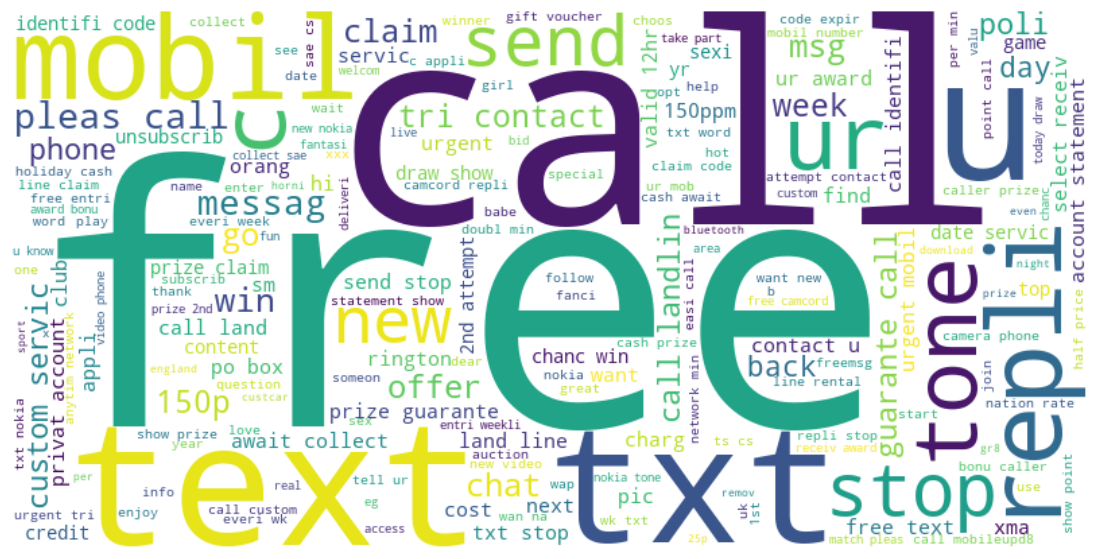

In [28]:
#Spam wordcloud
create_wordcloud(df1[df1['target'] == 1]['transformed_text'].str.cat(sep=" "))

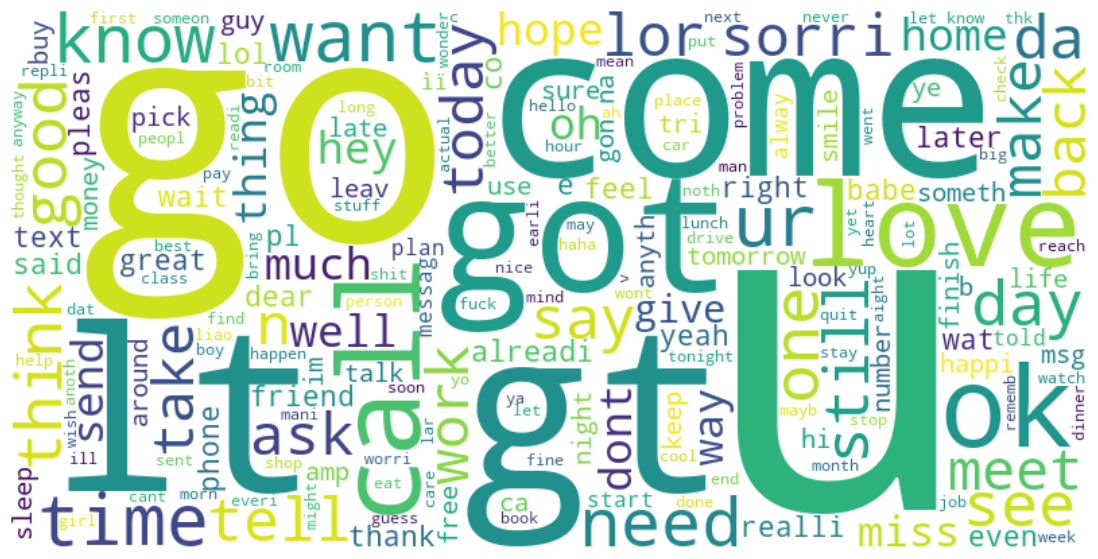

In [29]:
#Ham wordcloud
create_wordcloud(df1[df1['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [30]:
spam_sentence_list = df1[df1['target'] == 1]['transformed_text'].to_list()
spam_corpus = list(' '.join(i for i in spam_sentence_list).split())

In [31]:
ham_sentence_list = df1[df1['target'] == 0]['transformed_text'].to_list()
ham_corpus = list(' '.join(i for i in spam_sentence_list).split())

In [32]:
from collections import Counter
spam_top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
ham_top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30))

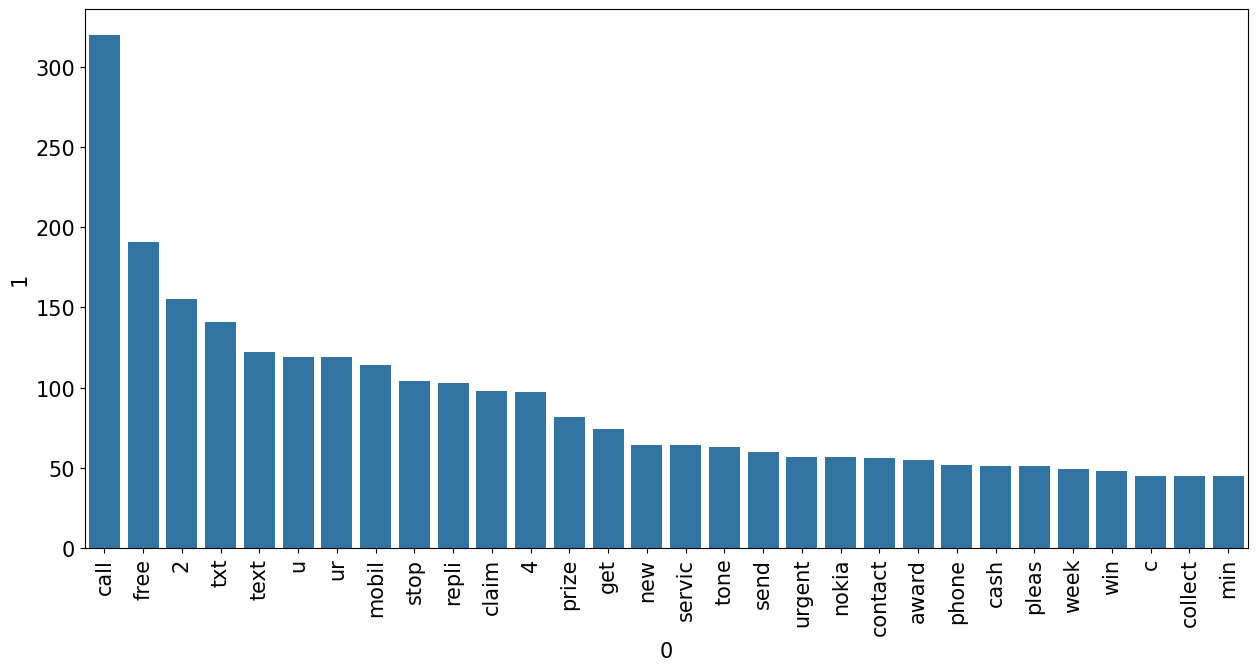

In [33]:
#Top 30 spam words
sns.barplot(x=spam_top_30[0],y=spam_top_30[1])
plt.xticks(rotation='vertical')
plt.show()

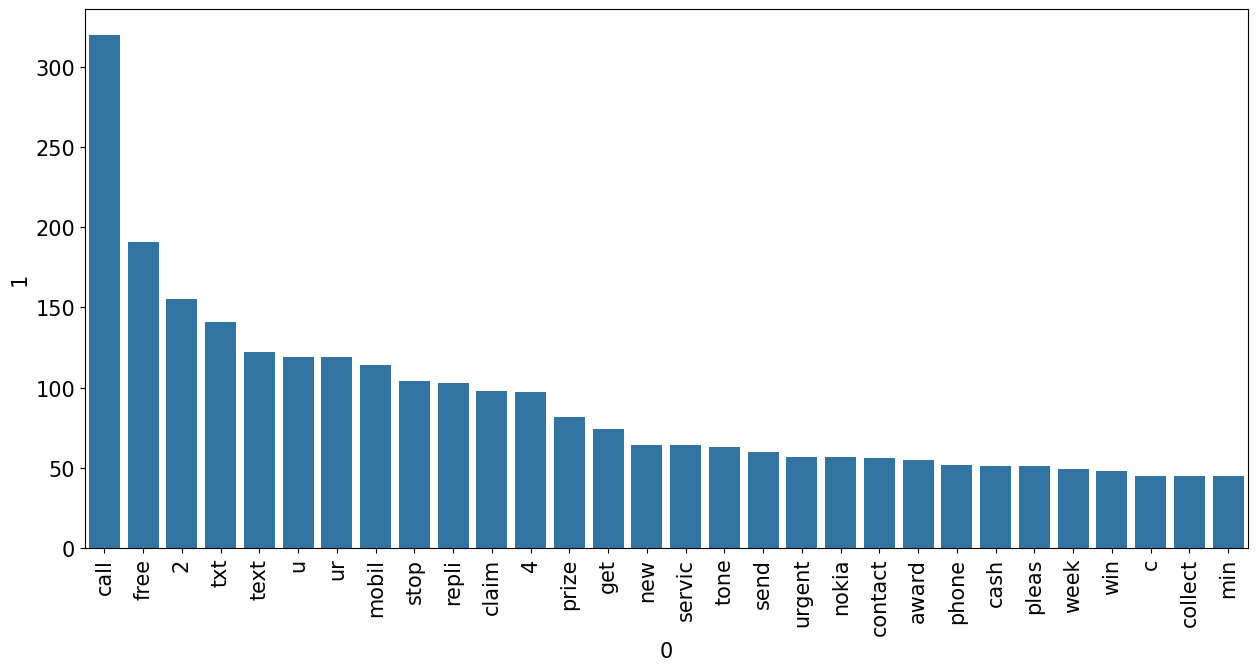

In [34]:
#Top 30 ham words
sns.barplot(x=ham_top_30[0],y=ham_top_30[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [35]:
data = df1[['transformed_text','target']]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Defining classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(n_jobs=-1),
    "SVC": SVC(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(n_jobs=-1),
    "RandomForestClassifier": RandomForestClassifier(n_jobs=-1),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(n_jobs=-1),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "XGBClassifier": XGBClassifier(n_jobs=-1)
}

# Define scorers
accuracy_scorer = make_scorer(accuracy_score)
precision_scorer = make_scorer(precision_score, average='binary')

# Results dataframe
results_df = pd.DataFrame(columns=["Classifier", "Vectorizer", "Accuracy", "Precision"])

# Preprocess data once with each vectorizer
def preprocess_data(vectorizer, vectorizer_name):
    X = data['transformed_text']
    y = data['target']
    X = vectorizer.fit_transform(X).toarray()
    return X, y

# Function to evaluate classifiers with cross-validation
def evaluate_classifiers_with_cv(X, y, vectorizer_name, cv=5):
    for clf_name, clf in classifiers.items():
        # Perform cross-validation
        accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring=accuracy_scorer, n_jobs=-1)
        precision_scores = cross_val_score(clf, X, y, cv=cv, scoring=precision_scorer, n_jobs=-1)
        
        # Average accuracy and precision across the folds
        accuracy = accuracy_scores.mean()
        precision = precision_scores.mean()

        # Store results in the dataframe
        results_df.loc[len(results_df)] = [clf_name, vectorizer_name, accuracy, precision]

# Evaluate using CountVectorizer
X_cv, y_cv = preprocess_data(CountVectorizer(), "CountVectorizer")
evaluate_classifiers_with_cv(X_cv, y_cv, "CountVectorizer", cv=5)

# Evaluate using TfidfVectorizer
X_tfidf, y_tfidf = preprocess_data(TfidfVectorizer(), "TfidfVectorizer")
evaluate_classifiers_with_cv(X_tfidf, y_tfidf, "TfidfVectorizer", cv=5)


/Users/imhvs0609/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/imhvs0609/miniforge3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/imhvs0609/miniforge3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/imhvs0609/miniforge3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

In [37]:
results_df.sort_values(by=['Precision','Accuracy'],ascending=False)

,Classifier,Vectorizer,Accuracy,Precision
15,MultinomialNB,TfidfVectorizer,0.960339,1.000000
6,KNeighborsClassifier,CountVectorizer,0.909655,1.000000
19,KNeighborsClassifier,TfidfVectorizer,0.900369,1.000000
1,SVC,CountVectorizer,0.968078,0.996012
20,RandomForestClassifier,TfidfVectorizer,0.968851,0.995788
7,RandomForestClassifier,CountVectorizer,0.967110,0.993582
23,ExtraTreesClassifier,TfidfVectorizer,0.973688,0.988181
14,SVC,TfidfVectorizer,0.966917,0.987692
10,ExtraTreesClassifier,CountVectorizer,0.972720,0.986310
0,LogisticRegression,CountVectorizer,0.976010,0.985267


In [40]:
top_5_models = results_df.loc[[15,0,1,20,23]]
top_5_models.sort_values(by=['Precision','Accuracy'],ascending=False)

,Classifier,Vectorizer,Accuracy,Precision
15,MultinomialNB,TfidfVectorizer,0.960339,1.000000
1,SVC,CountVectorizer,0.968078,0.996012
20,RandomForestClassifier,TfidfVectorizer,0.968851,0.995788
23,ExtraTreesClassifier,TfidfVectorizer,0.973688,0.988181
0,LogisticRegression,CountVectorizer,0.976010,0.985267


In [41]:
# Defining classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(n_jobs=-1),
    "SVC": SVC(),
    "MultinomialNB": MultinomialNB(),
    "RandomForestClassifier": RandomForestClassifier(n_jobs=-1),
    "ExtraTreesClassifier": ExtraTreesClassifier(n_jobs=-1)
}

# Define precision scorer (accuracy is built-in, so no need to redefine)
precision_scorer = make_scorer(precision_score, average='binary')

# Updated Results dataframe to include max_features
results_df = pd.DataFrame(columns=["Classifier", "Vectorizer", "Max Features", "Accuracy", "Precision"])

# Preprocess data once with each vectorizer and max_features
def preprocess_data(vectorizer, max_features):
    X = data['transformed_text']
    y = data['target']
    vectorizer.set_params(max_features=max_features)  # Set max_features
    X = vectorizer.fit_transform(X).toarray()
    return X, y

# Function to evaluate classifiers with cross-validation
def evaluate_classifiers_with_cv(X, y, vectorizer_name, max_features, cv=5):
    for clf_name, clf in classifiers.items():
        # Perform cross-validation for accuracy using built-in 'accuracy' scoring
        accuracy_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
        
        # Perform cross-validation for precision using the custom scorer
        precision_scores = cross_val_score(clf, X, y, cv=cv, scoring=precision_scorer, n_jobs=-1)
        
        # Average accuracy and precision across the folds
        accuracy = accuracy_scores.mean()
        precision = precision_scores.mean()

        # Store results in the dataframe
        results_df.loc[len(results_df)] = [clf_name, vectorizer_name, max_features, accuracy, precision]

# List of max_features to loop over
max_features_list = [1000, 2000, 3000, 4000, 5000]

# Loop over max_features values and evaluate using both vectorizers
for max_features in max_features_list:
    # Evaluate using CountVectorizer
    vectorizer_cv = CountVectorizer()
    X_cv, y_cv = preprocess_data(vectorizer_cv, max_features)
    evaluate_classifiers_with_cv(X_cv, y_cv, "CountVectorizer", max_features, cv=5)

    # Evaluate using TfidfVectorizer
    vectorizer_tfidf = TfidfVectorizer()
    X_tfidf, y_tfidf = preprocess_data(vectorizer_tfidf, max_features)
    evaluate_classifiers_with_cv(X_tfidf, y_tfidf, "TfidfVectorizer", max_features, cv=5)


/Users/imhvs0609/miniforge3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [43]:
results_df.sort_values(by=['Precision','Accuracy'],ascending=False)

,Classifier,Vectorizer,Max Features,Accuracy,Precision
11,SVC,CountVectorizer,2000,0.970400,0.996075
21,SVC,CountVectorizer,3000,0.970593,0.996033
31,SVC,CountVectorizer,4000,0.969046,0.996015
37,MultinomialNB,TfidfVectorizer,4000,0.967885,0.995833
43,RandomForestClassifier,CountVectorizer,5000,0.968658,0.995716
47,MultinomialNB,TfidfVectorizer,5000,0.964208,0.995402
1,SVC,CountVectorizer,1000,0.972915,0.994321
33,RandomForestClassifier,CountVectorizer,4000,0.970205,0.994076
41,SVC,CountVectorizer,5000,0.968465,0.994051
27,MultinomialNB,TfidfVectorizer,3000,0.972915,0.992381


In [46]:
top_models_max_ft = results_df.loc[[11]]
top_models_max_ft

,Classifier,Vectorizer,Max Features,Accuracy,Precision
11,SVC,CountVectorizer,2000,0.9704,0.996075


In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score
from sklearn.pipeline import make_pipeline


def preprocess_data(vectorizer, max_features):
    X = data['transformed_text']
    y = data['target']
    vectorizer.set_params(max_features=max_features)  # Set max_features
    X = vectorizer.fit_transform(X).toarray()
    return X, y

# Define precision scorer
precision_scorer = make_scorer(precision_score, average='binary')

# Preprocess the data for SVC with CountVectorizer (max_features=2000)
vectorizer_cv_svc = CountVectorizer(max_features=2000)

# Preprocess the data for MultinomialNB with TfidfVectorizer (no limit on max_features)
vectorizer_tfidf_nb = TfidfVectorizer()

# Create a Voting Classifier using SVC (CountVectorizer) and MultinomialNB (TfidfVectorizer)
voting_clf = VotingClassifier(
    estimators=[
        ('svc', make_pipeline(vectorizer_cv_svc, SVC(probability=True))),  # Using SVC with CountVectorizer (max_features=2000)
        ('mnb', make_pipeline(vectorizer_tfidf_nb, MultinomialNB()))  # Using MultinomialNB with TfidfVectorizer (no limit)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

# Function to perform cross-validation and evaluate the voting classifier
def evaluate_voting_classifier(X, y, vectorizer_name, cv=5):
    # Perform cross-validation for accuracy
    accuracy_scores = cross_val_score(voting_clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    
    # Perform cross-validation for precision
    precision_scores = cross_val_score(voting_clf, X, y, cv=cv, scoring=precision_scorer, n_jobs=-1)
    
    # Average accuracy and precision across the folds
    accuracy = accuracy_scores.mean()
    precision = precision_scores.mean()
    
    print(f"Voting Classifier ({vectorizer_name}) - Accuracy: {accuracy}, Precision: {precision}")

# Since each vectorizer is specific to a classifier, we need to separately evaluate them
# Evaluate Voting Classifier for SVC (CountVectorizer) + MultinomialNB (TfidfVectorizer)
X = data['transformed_text']
y = data['target']
evaluate_voting_classifier(X, y, "Count2000_TFIDF", cv=5)


Voting Classifier (Count2000_TFIDF) - Accuracy: 0.977364383469304, Precision: 0.9962616822429906


In [65]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Define precision scorer
precision_scorer = make_scorer(precision_score, average='binary')

# Load the raw text data (assuming X is your list of documents and y is the target labels)
X = data['transformed_text']  # Replace with actual data loading
y = data['target']  # Replace with actual target labels

# Define vectorizers
vectorizer_cv_svc = CountVectorizer(max_features=2000)  # SVC with 2000 max features
vectorizer_tfidf_nb = TfidfVectorizer()  # MultinomialNB with no limit on max features

# Define base classifiers with their specific vectorizers
base_classifiers = [
    ('svc', make_pipeline(vectorizer_cv_svc, SVC(probability=True))),  # SVC with CountVectorizer
    ('mnb', make_pipeline(vectorizer_tfidf_nb, MultinomialNB()))  # MultinomialNB with TfidfVectorizer
]

# Define meta-classifiers to evaluate
meta_classifiers = {
    "LogisticRegression": LogisticRegression(),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "SVC": SVC()
}

# DataFrame to store the results
stacking_results_df = pd.DataFrame(columns=["Meta-Classifier", "Vectorizer", "Accuracy", "Precision"])

# Function to evaluate the StackingClassifier with cross-validation
def evaluate_stacking_classifier(X, y, vectorizer_name, meta_clf_name, meta_clf, cv=5):
    # Create the Stacking Classifier
    stacking_clf = StackingClassifier(
        estimators=base_classifiers,
        final_estimator=meta_clf
    )
    
    # Perform cross-validation for accuracy
    accuracy_scores = cross_val_score(stacking_clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    
    # Perform cross-validation for precision
    precision_scores = cross_val_score(stacking_clf, X, y, cv=cv, scoring=precision_scorer, n_jobs=-1)
    
    # Average accuracy and precision across the folds
    accuracy = accuracy_scores.mean()
    precision = precision_scores.mean()

    # Store the result in the DataFrame
    stacking_results_df.loc[len(stacking_results_df)] = [meta_clf_name, vectorizer_name, accuracy, precision]

# Evaluate each meta-classifier for each vectorizer
for meta_clf_name, meta_clf in meta_classifiers.items():
    # Evaluate with CountVectorizer (max_features=2000) for SVC
    evaluate_stacking_classifier(X, y, "Count2000-TFIDF", meta_clf_name, meta_clf, cv=5)


In [66]:
stacking_results_df.sort_values(by=['Precision','Accuracy'],ascending=False)

,Meta-Classifier,Vectorizer,Accuracy,Precision
0,LogisticRegression,Count2000-TFIDF,0.981814,0.984294
1,RidgeClassifier,Count2000-TFIDF,0.980847,0.984288
4,SVC,Count2000-TFIDF,0.981814,0.968300
2,RandomForestClassifier,Count2000-TFIDF,0.982201,0.961861
3,GradientBoostingClassifier,Count2000-TFIDF,0.979106,0.935724


In [71]:
#Best Model - MultinomialNB	TfidfVectorizer(no max_ft)	0.960339 A	1.000000 P

import pickle

# Preprocess data once with each vectorizer and max_features
def preprocess_data(vectorizer):
    X = data['transformed_text']
    y = data['target']
    X = vectorizer.fit_transform(X).toarray()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    return X_train, X_test, y_train, y_test
    
# Re-initialize the vectorizer and classifier
vectorizer = TfidfVectorizer()
classifier = MultinomialNB()

# Preprocess the data again (this should be the same as before)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = preprocess_data(vectorizer)

# Train the final RidgeClassifier model
classifier.fit(X_train_cv, y_train_cv)


MultinomialNB()

In [72]:
# Save the vectorizer and the trained model as pickle files
with open("vectorizer.pkl", 'wb') as f:
    pickle.dump(vectorizer, f)

with open("model.pkl", 'wb') as f:
    pickle.dump(classifier, f)
